inputs = (n_inputs, pixel_width, pixel_height) = (1797, 8, 8)
labels = (n_inputs) = (1797,)
X = (n_inputs, n_features) = (1797, 64)


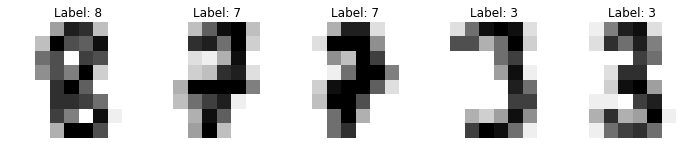

In [1]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


# ensure the same random numbers appear every time
np.random.seed(0)

# display images in notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,12)


# download MNIST dataset
digits = datasets.load_digits()

# define inputs and labels
inputs = digits.images
labels = digits.target

print("inputs = (n_inputs, pixel_width, pixel_height) = " + str(inputs.shape))
print("labels = (n_inputs) = " + str(labels.shape))


# flatten the image
# the value -1 means dimension is inferred from the remaining dimensions: 8x8 = 64
n_inputs = len(inputs)
inputs = inputs.reshape(n_inputs, -1)
print("X = (n_inputs, n_features) = " + str(inputs.shape))


# choose some random images to display
indices = np.arange(n_inputs)
random_indices = np.random.choice(indices, size=5)

for i, image in enumerate(digits.images[random_indices]):
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title("Label: %d" % digits.target[random_indices[i]])
plt.show()


In [2]:
from sklearn.model_selection import train_test_split

# one-liner from scikit-learn library
train_size = 0.8
test_size = 1 - train_size
X_train, X_test, Y_train, Y_test = train_test_split(inputs, labels, train_size=train_size,
                                                    test_size=test_size)


In [3]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = np.array([5, 10, 100, 1000])
min_samples_split = np.array([2, 10, 100, 10000])

RFC_scikit = np.zeros((len(n_estimators), len(min_samples_split)), dtype=object)

for i, n in enumerate(n_estimators):
    for j, m in enumerate(min_samples_split):
        RFC = RandomForestClassifier(n_estimators=n, min_samples_split=m)
        RFC.fit(X_train, Y_train)
        
        print("Number of estimators = ", n)
        print("Minimum sample split = ", m)
        print("Test accuracy: %.3f" % RFC.score(X_test, Y_test))
        print()
        
        RFC_scikit[i][j] = RFC

Number of estimators =  5
Minimum sample split =  2
Test accuracy: 0.914

Number of estimators =  5
Minimum sample split =  10
Test accuracy: 0.917

Number of estimators =  5
Minimum sample split =  100
Test accuracy: 0.797

Number of estimators =  5
Minimum sample split =  10000
Test accuracy: 0.106

Number of estimators =  10
Minimum sample split =  2
Test accuracy: 0.939

Number of estimators =  10
Minimum sample split =  10
Test accuracy: 0.939

Number of estimators =  10
Minimum sample split =  100
Test accuracy: 0.844

Number of estimators =  10
Minimum sample split =  10000
Test accuracy: 0.089

Number of estimators =  100
Minimum sample split =  2
Test accuracy: 0.986

Number of estimators =  100
Minimum sample split =  10
Test accuracy: 0.981

Number of estimators =  100
Minimum sample split =  100
Test accuracy: 0.894

Number of estimators =  100
Minimum sample split =  10000
Test accuracy: 0.089

Number of estimators =  1000
Minimum sample split =  2
Test accuracy: 0.986

Nu

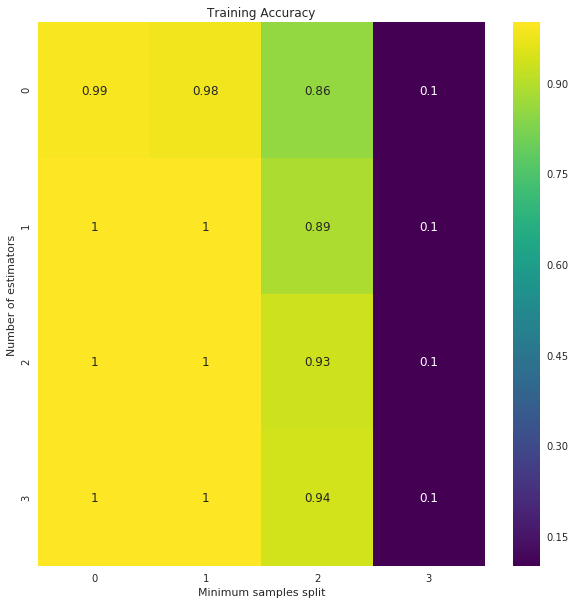

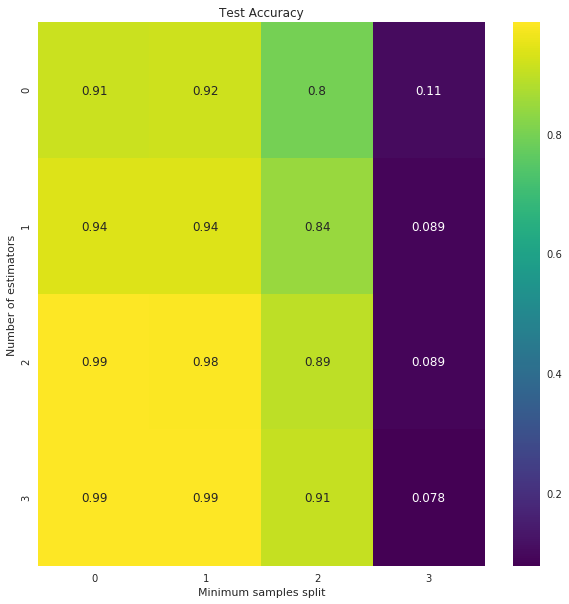

In [4]:
# optional
# visual representation of grid search
# uses seaborn heatmap, could probably do this in matplotlib
import seaborn as sns

sns.set()

train_accuracy = np.zeros((len(n_estimators), len(min_samples_split)))
test_accuracy = np.zeros((len(n_estimators), len(min_samples_split)))

for i in range(len(n_estimators)):
    for j in range(len(min_samples_split)):
        RFC = RFC_scikit[i][j]

        train_accuracy[i][j] = RFC.score(X_train, Y_train)
        test_accuracy[i][j] = RFC.score(X_test, Y_test)

        
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(train_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Training Accuracy")
ax.set_ylabel("Number of estimators")
ax.set_xlabel("Minimum samples split")
plt.show()

fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(test_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Test Accuracy")
ax.set_ylabel("Number of estimators")
ax.set_xlabel("Minimum samples split")
plt.show()
